In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *

In [2]:
titanic = pd.read_csv('train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("Total number of individuals : ",titanic.shape[0])
print("Missing data for each column in percentage : ")
(titanic.isnull().sum()/titanic.shape[0])*100

Total number of individuals :  891
Missing data for each column in percentage : 


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [5]:
#Cabin does look like a feature which should be dropped since more than 75% of the data is null
#Age and embarked can be worked upon to remove the null values
#We'll see what to do with them ! 
#But the first step currently is to perform EDA (Exploratory Data Analysis)

# Survived vs Not survived

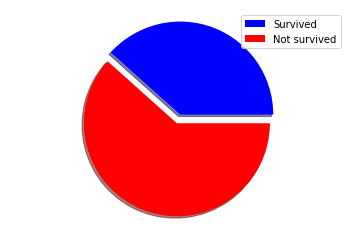

In [6]:
labels = ['Survived','Not survived']
sizes = [titanic[titanic['Survived']==1].PassengerId.count(),titanic[titanic['Survived']==0].PassengerId.count()]
colors = ['blue','red']
explode = (0.1,0)
patches,text = plt.pie(sizes,explode=explode,colors=colors, shadow=True)
plt.legend(patches,labels,loc='best')
plt.axis('equal')
plt.show()

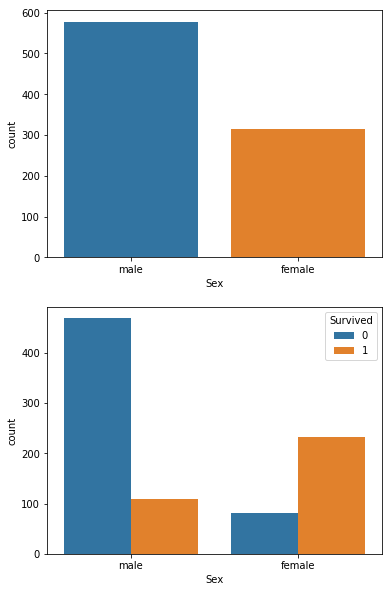

In [7]:
plt.subplots(figsize=(6,10))
subplot(2,1,1)
sns.countplot('Sex',data=titanic)
subplot(2,1,2)
sns.countplot('Sex',hue='Survived',data=titanic)
plt.show()

In [8]:
titanic.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [9]:
#Females were saved more ! Naaiice !

In [10]:
pd.crosstab(titanic.Pclass,titanic.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


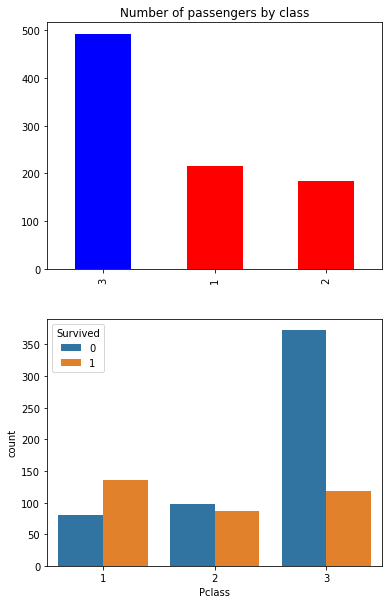

In [11]:
plt.subplots(figsize=(6,10))
subplot(2,1,1)
a=titanic['Pclass'].value_counts().plot.bar(color=['red'])
a.set_title('Number of passengers by class')
a.patches[0].set_facecolor('b')
subplot(2,1,2)
sns.countplot('Pclass',hue='Survived',data=titanic)
plt.show()

In [12]:
#Class 1 passengers survived more than any other class
#Class 3 passengers died more !

In [13]:
pd.crosstab([titanic.Pclass,titanic.Sex],titanic.Survived,margins=True).style.background_gradient(cmap='summer_r')

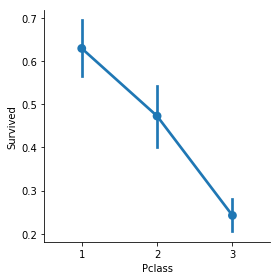

In [14]:
sns.factorplot('Pclass','Survived',data=titanic)
plt.show()

In [15]:
#Class 1 survived the most !

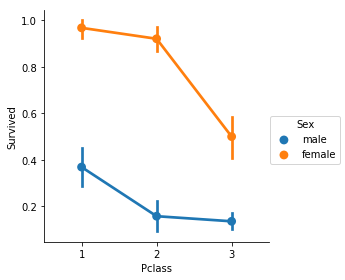

In [16]:
sns.factorplot('Pclass','Survived',hue='Sex',data=titanic)
plt.show()

In [17]:
#Females of Class1 survived the most ! Money does talk !

In [18]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
print("Maximum Age : ",titanic['Age'].max())
print("Minimum Age : ",titanic['Age'].min())
print("Mean Age : ",titanic['Age'].mean())

Maximum Age :  80.0
Minimum Age :  0.42
Mean Age :  29.69911764705882


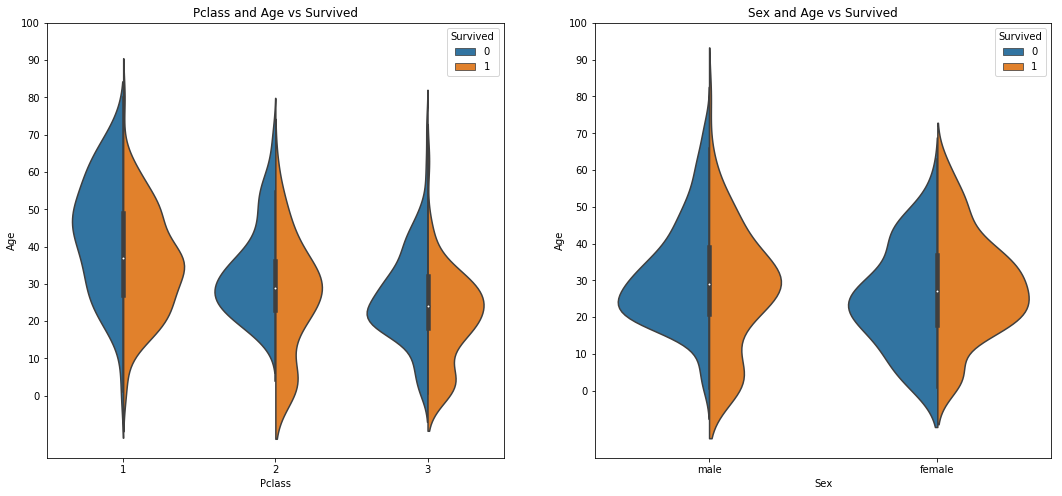

In [20]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=titanic,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=titanic,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [21]:
titanic['Initials']=0
titanic['Initials']=titanic.Name.str.extract('([A-Za-z]+)\.')

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [22]:
pd.crosstab(titanic.Initials,titanic.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Initials,,,
Capt,1,0,1
Col,1,1,2
Countess,0,1,1
Don,1,0,1
Dr,4,3,7
Jonkheer,1,0,1
Lady,0,1,1
Major,1,1,2
Master,17,23,40


In [23]:
titanic['Initials'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [24]:
titanic.groupby('Initials')['Age'].mean()

Initials
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [25]:
titanic.loc[(titanic.Age.isnull())&(titanic.Initials=='Mr'),'Age']=33
titanic.loc[(titanic.Age.isnull())&(titanic.Initials=='Mrs'),'Age']=36
titanic.loc[(titanic.Age.isnull())&(titanic.Initials=='Master'),'Age']=5
titanic.loc[(titanic.Age.isnull())&(titanic.Initials=='Miss'),'Age']=22
titanic.loc[(titanic.Age.isnull())&(titanic.Initials=='Other'),'Age']=46

In [26]:
titanic.Age.isnull().sum()

0

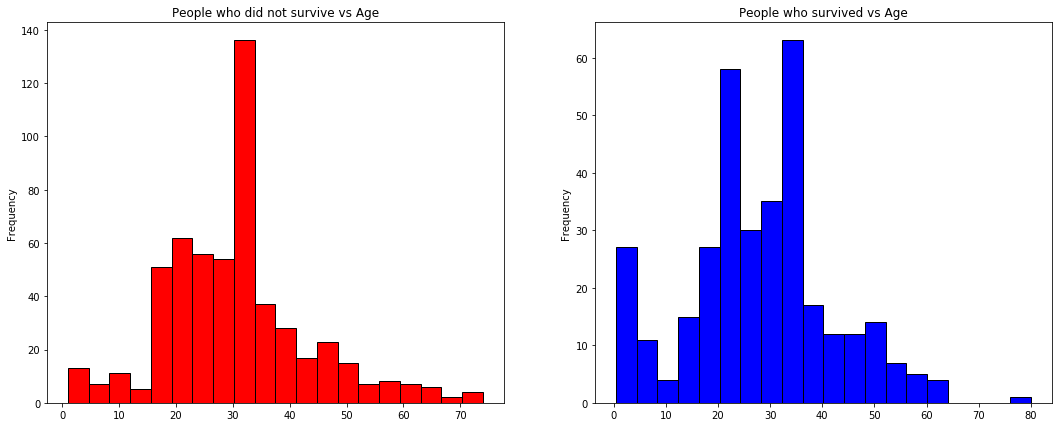

In [27]:
f,ax = plt.subplots(1,2,figsize=(18,7))
titanic[titanic.Survived==0].Age.plot.hist(ax=ax[0],color='red',edgecolor='black',bins=20)
ax[0].set_title('People who did not survive vs Age')
titanic[titanic.Survived==1].Age.plot.hist(ax=ax[1],color='blue',edgecolor='black',bins=20)
ax[1].set_title('People who survived vs Age')
plt.show()

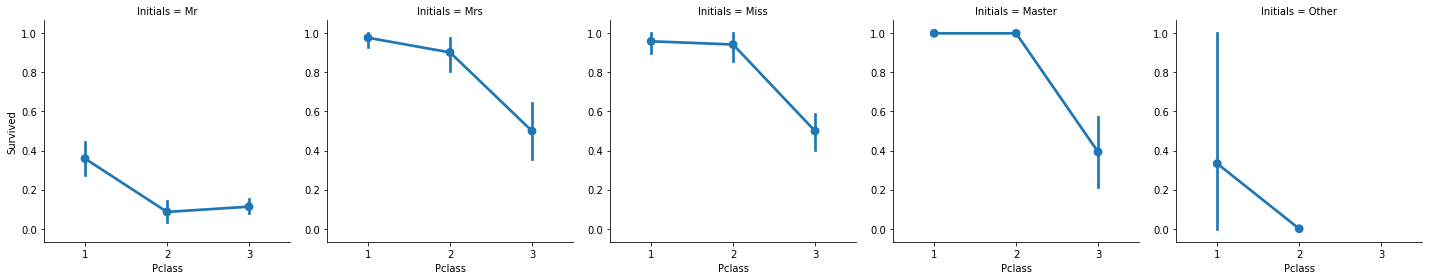

In [28]:
sns.factorplot('Pclass','Survived',col='Initials',data=titanic)
plt.show()

In [29]:
pd.crosstab([titanic.Embarked,titanic.Pclass],[titanic.Sex,titanic.Survived],margins=True).style.background_gradient(cmap='summer_r')

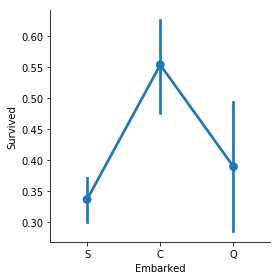

In [30]:
sns.factorplot('Embarked','Survived',data=titanic)
plt.show()

In [31]:
#C class survived the most (People who got on C port)

In [32]:
titanic.Embarked.isnull().sum()

2

In [33]:
titanic.Embarked.value_counts() 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
#Maximum Class is S hence I won't be doing much calculations for just 2 null values

In [35]:
titanic['Embarked'].fillna('S',inplace=True)

In [36]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Initials         0
dtype: int64

In [37]:
#Cabin seems like the column which should be dropped(as discussed above) since we can't actually determine cabin category for 77% of the data

In [38]:
pd.crosstab([titanic.SibSp],titanic.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [39]:
#People who had no relatives or very less siblings survived the most !

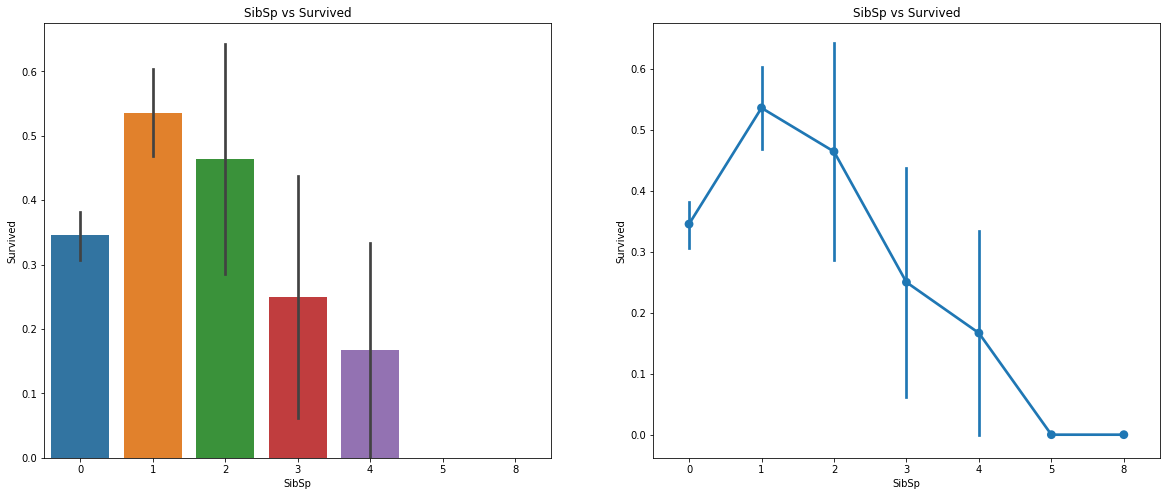

In [40]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=titanic,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=titanic,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()
#Remember the two graphs barplot and factorplot pretty much represent the same information !

In [41]:
pd.crosstab(titanic.Parch,titanic.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


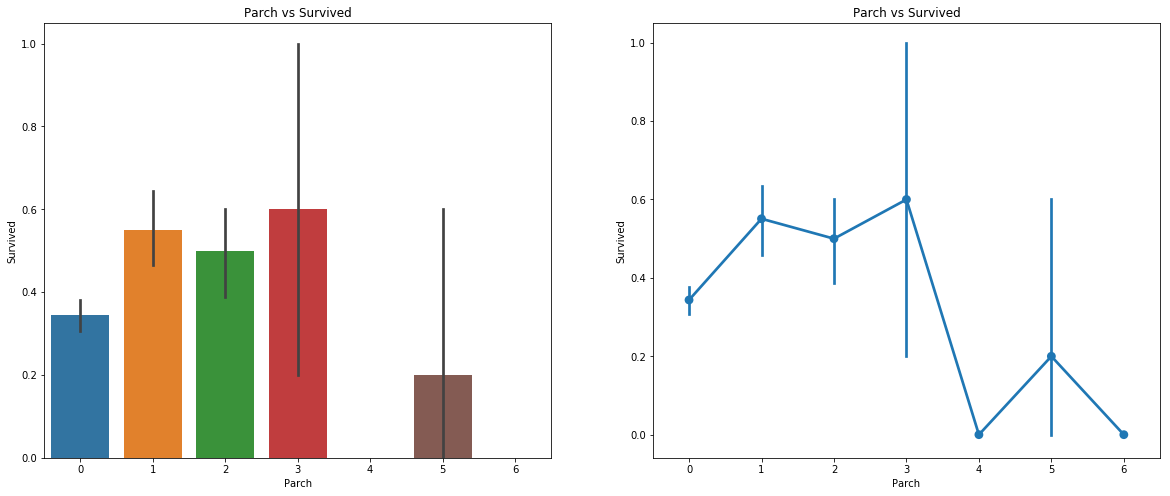

In [42]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=titanic,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=titanic,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

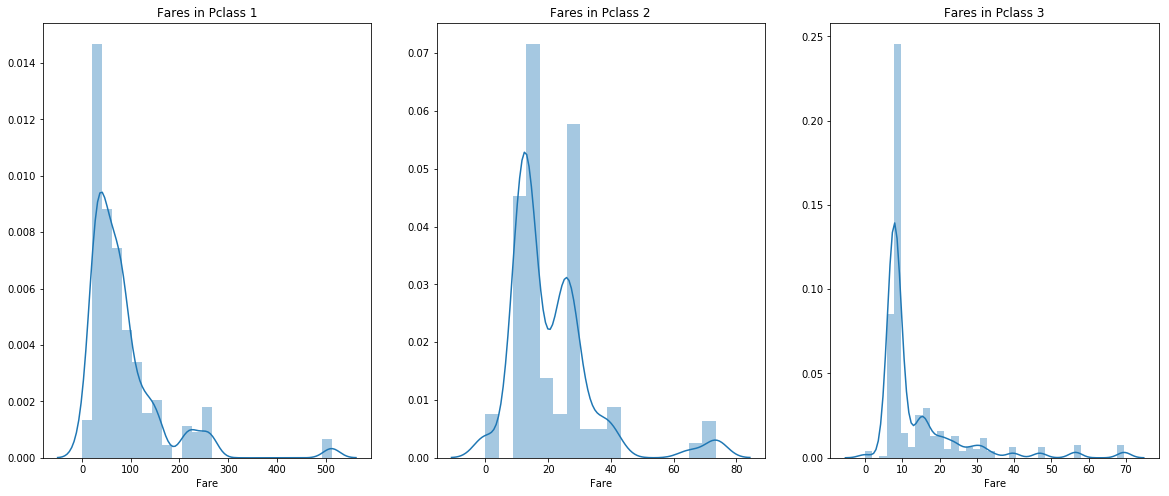

In [43]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(titanic[titanic['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(titanic[titanic['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(titanic[titanic['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

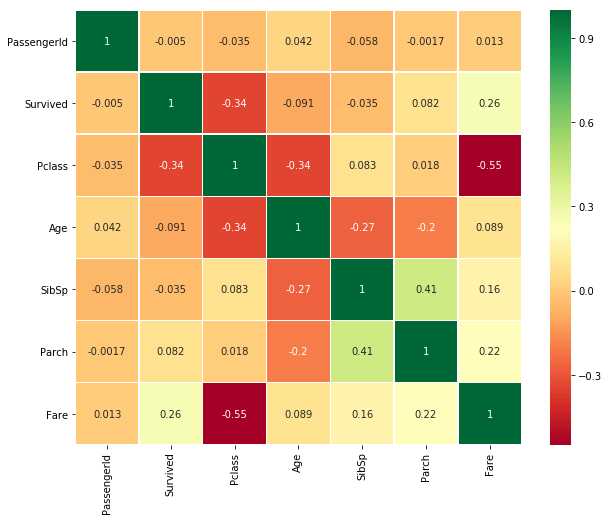

In [44]:
sns.heatmap(titanic.corr(),annot=True,cmap='RdYlGn',linewidths=0.5)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [45]:
titanic['Age_bins']=0
titanic.loc[titanic['Age']<=16,'Age_bins']=0
titanic.loc[(titanic['Age']>16)&(titanic['Age']<=32),'Age_bins']=1
titanic.loc[(titanic['Age']>32)&(titanic['Age']<=48),'Age_bins']=2
titanic.loc[(titanic['Age']>48)&(titanic['Age']<=64),'Age_bins']=3
titanic.loc[(titanic['Age']>64)&(titanic['Age']<=80),'Age_bins']=4
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials,Age_bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [46]:
titanic.Age_bins.value_counts().to_frame()

,Age_bins
1,382
2,325
0,104
3,69
4,11


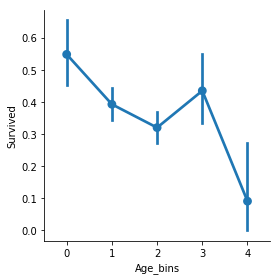

In [47]:
sns.factorplot('Age_bins','Survived',data=titanic)
plt.show()

In [48]:
titanic['Family_size']=0
titanic['Family_size']=titanic['Parch']+titanic['SibSp']
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials,Age_bins,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0


In [49]:
titanic['Alone']=0
titanic.loc[titanic['Family_size']==0,'Alone']=1

In [50]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials,Age_bins,Family_size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1


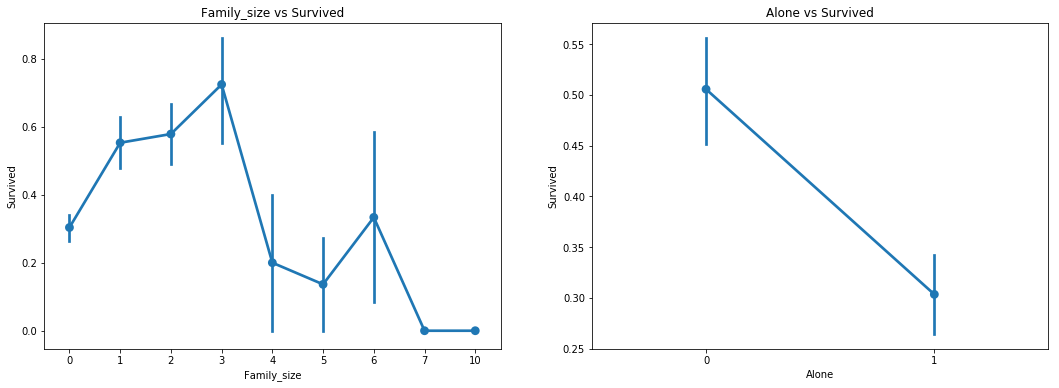

In [51]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_size','Survived',data=titanic,ax=ax[0])
ax[0].set_title('Family_size vs Survived')
sns.factorplot('Alone','Survived',data=titanic,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)#0,1 are the outputs we need, we are getting 2,3 as extra !
plt.close(3)
plt.show()

In [52]:
#pd.qcut = cuts column continuous into data bins as passed much like in our above age case

In [53]:
titanic['Fare_range']=pd.qcut(titanic['Fare'],4)

In [54]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials,Age_bins,Family_size,Alone,Fare_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1,"(7.91, 14.454]"


In [55]:
titanic.groupby(['Fare_range'])['Survived'].mean()

Fare_range
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64

In [56]:
#pd.qcut divides in range but doesn't alot a specific categorical value ! We'll do that now

In [57]:
titanic['Fare_cat']=0
titanic.loc[titanic['Fare']<=7.91,'Fare_cat']=0
titanic.loc[(titanic['Fare']>7.91)&(titanic['Fare']<=14.454),'Fare_cat']=1
titanic.loc[(titanic['Fare']>14.454)&(titanic['Fare']<=31),'Fare_cat']=2
titanic.loc[(titanic['Fare']>31)&(titanic['Fare']<=513),'Fare_cat']=3

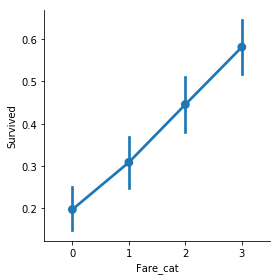

In [58]:
sns.factorplot('Fare_cat','Survived',data=titanic)
plt.show()

In [59]:
#Higher the fare more chances of survival # Money talks !

In [60]:
titanic['Sex'].replace(['male','female'],[0,1],inplace=True)
titanic['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
titanic['Initials'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [61]:
titanic.drop(['Name','Age','Ticket','Fare','Cabin','Fare_range','PassengerId'],axis=1,inplace=True)

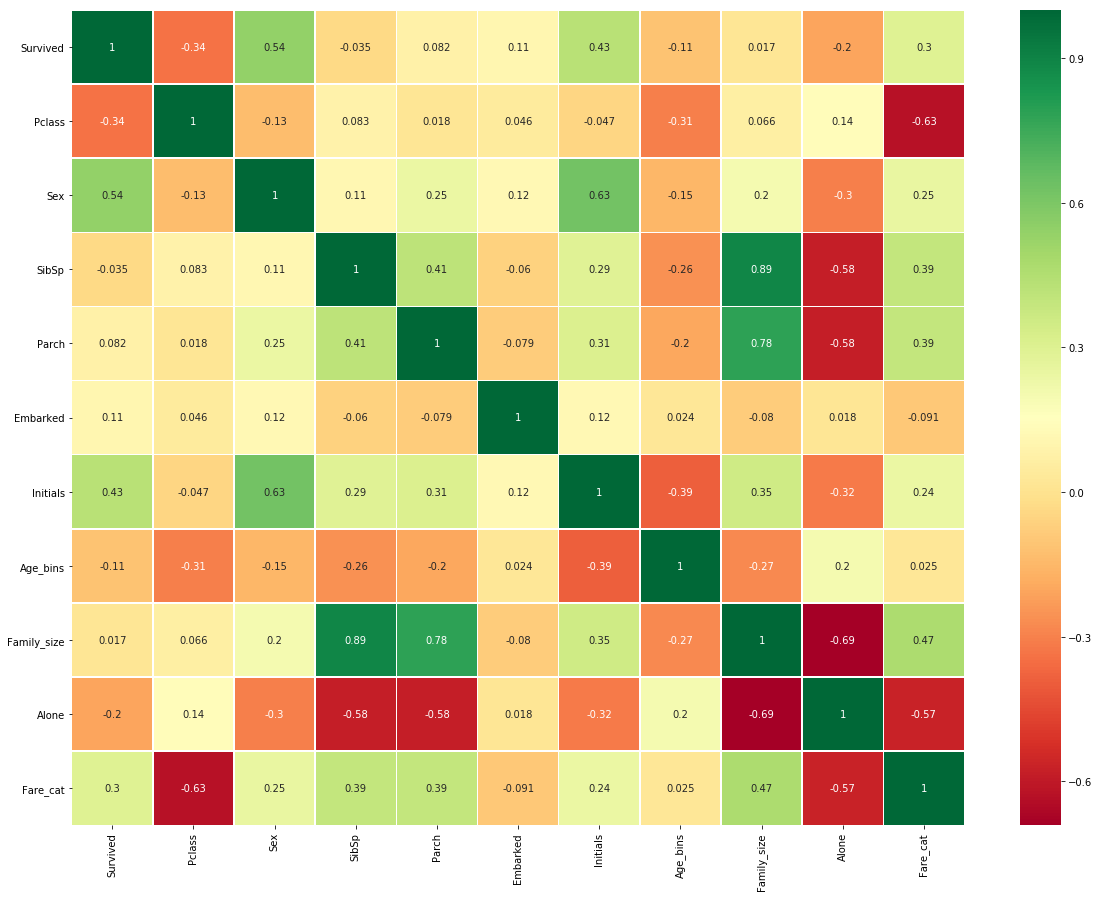

In [62]:
sns.heatmap(titanic.corr(),annot=True,linewidths=0.5,cmap='RdYlGn')
f = plt.gcf()
f.set_size_inches(20,15)
plt.show()

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [65]:
train,test=train_test_split(titanic,test_size=0.3,random_state=0,stratify=titanic['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=titanic[titanic.columns[1:]]
Y=titanic['Survived']

In [66]:
model1 = LogisticRegression()
model1.fit(train_X,train_Y)
model1.score(test_X,test_Y)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.81716417910447758

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
model2 = KNeighborsClassifier()
model2.fit(train_X,train_Y)
model2.score(test_X,test_Y)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.83208955223880599

In [69]:
#For different k values

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


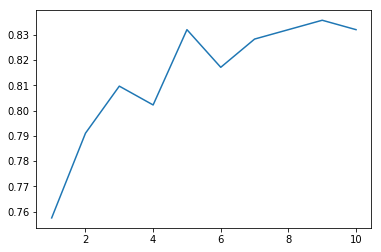

Highest score : 0.835820895522 for k = 9


In [70]:
a = list(range(1,11))
a1 = list()
for i in range(10):
    model2 = KNeighborsClassifier(n_neighbors=i+1)
    model2.fit(train_X,train_Y)
    a1.append(model2.score(test_X,test_Y))
plt.plot(a,a1)
plt.show()
print('Highest score :',max(a1),'for k =',a1.index(max(a1))+1)

In [71]:
from sklearn.naive_bayes import GaussianNB

In [72]:
model3 = GaussianNB()
model3.fit(train_X,train_Y)
model3.score(test_X,test_Y)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.81343283582089554

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
model4 = DecisionTreeClassifier()
model4.fit(train_X,train_Y)
model4.score(test_X,test_Y)

0.80970149253731338

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
model5 = RandomForestClassifier()
model5.fit(train_X,train_Y)
model5.score(test_X,test_Y)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.79477611940298509

In [77]:
from sklearn import svm

In [78]:
model6 = svm.SVC(kernel='linear')
model6.fit(train_X,train_Y)
model6.score(test_X,test_Y)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.79850746268656714

In [79]:
model7 = svm.SVC(kernel='rbf')
model7.fit(train_X,train_Y)
model7.score(test_X,test_Y)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.83582089552238803

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [81]:
kfold = KFold(n_splits=10,random_state=0)
classifiers = ['Logistic Regression','K-Nearest Neighbors','Naive Bayes','Decision Tree','Random Forest','SVM linear','SVM Radial']
models = [LogisticRegression(), KNeighborsClassifier(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), svm.SVC(kernel='linear'), svm.SVC(kernel='rbf')]
x = list()
accuracy=list()
for i in models:
    model = i
    cv = cross_val_score(model,X,Y,cv=kfold,scoring='accuracy')
    x.append(cv.mean())
    accuracy.append(cv)
crossval = pd.DataFrame({'CV_Score':x},index=classifiers)
crossval.style.background_gradient(cmap='summer_r')

,CV_Score
Logistic Regression,0.805843
K-Nearest Neighbors,0.782347
Naive Bayes,0.801386
Decision Tree,0.809226
Random Forest,0.817066
SVM linear,0.793471
SVM Radial,0.82829


In [82]:
box=pd.DataFrame(accuracy,index=classifiers)
box

,0,1,2,3,4,5,6,7,8,9
Logistic Regression,0.800000,0.820225,0.775281,0.831461,0.797753,0.786517,0.797753,0.797753,0.853933,0.797753
K-Nearest Neighbors,0.711111,0.775281,0.741573,0.842697,0.797753,0.764045,0.820225,0.797753,0.820225,0.752809
Naive Bayes,0.766667,0.764045,0.786517,0.831461,0.775281,0.831461,0.820225,0.775281,0.842697,0.820225
Decision Tree,0.788889,0.831461,0.775281,0.820225,0.820225,0.775281,0.820225,0.775281,0.842697,0.842697
Random Forest,0.811111,0.842697,0.764045,0.842697,0.831461,0.797753,0.831461,0.764045,0.853933,0.831461
SVM linear,0.811111,0.831461,0.752809,0.876404,0.775281,0.808989,0.741573,0.730337,0.853933,0.752809
SVM Radial,0.822222,0.876404,0.786517,0.876404,0.808989,0.820225,0.797753,0.786517,0.876404,0.831461


In [83]:
box.T

,Logistic Regression,K-Nearest Neighbors,Naive Bayes,Decision Tree,Random Forest,SVM linear,SVM Radial
0,0.800000,0.711111,0.766667,0.788889,0.811111,0.811111,0.822222
1,0.820225,0.775281,0.764045,0.831461,0.842697,0.831461,0.876404
2,0.775281,0.741573,0.786517,0.775281,0.764045,0.752809,0.786517
3,0.831461,0.842697,0.831461,0.820225,0.842697,0.876404,0.876404
4,0.797753,0.797753,0.775281,0.820225,0.831461,0.775281,0.808989
5,0.786517,0.764045,0.831461,0.775281,0.797753,0.808989,0.820225
6,0.797753,0.820225,0.820225,0.820225,0.831461,0.741573,0.797753
7,0.797753,0.797753,0.775281,0.775281,0.764045,0.730337,0.786517
8,0.853933,0.820225,0.842697,0.842697,0.853933,0.853933,0.876404
9,0.797753,0.752809,0.820225,0.842697,0.831461,0.752809,0.831461


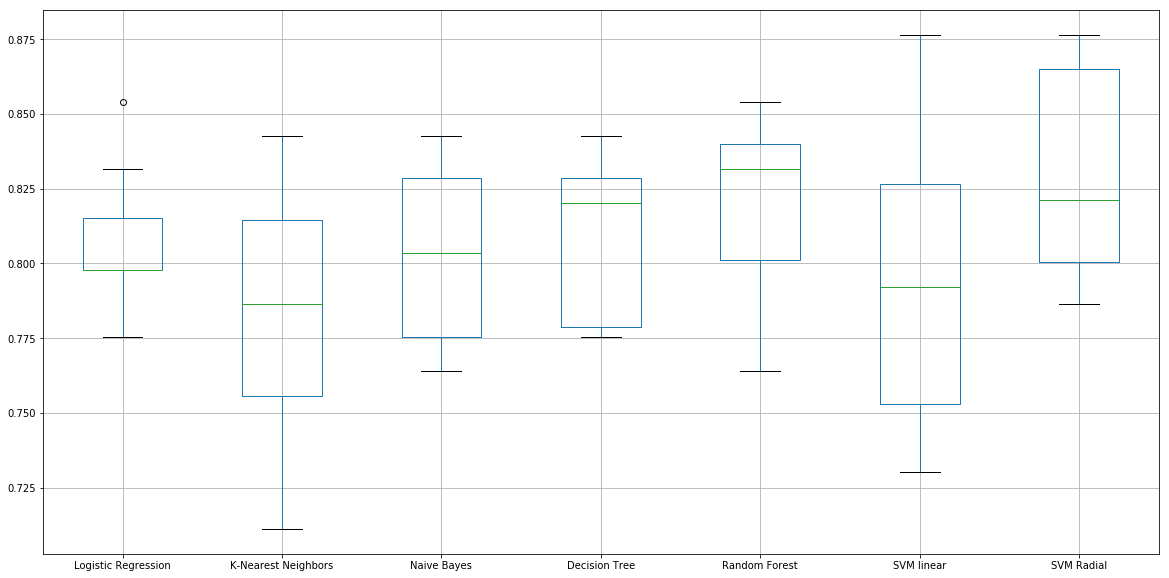

In [84]:
box.T.boxplot()
f = plt.gcf()
f.set_size_inches(20,10)
plt.show()

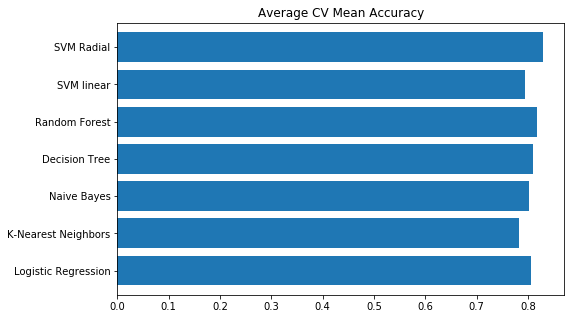

In [85]:
crossval['CV_Score'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

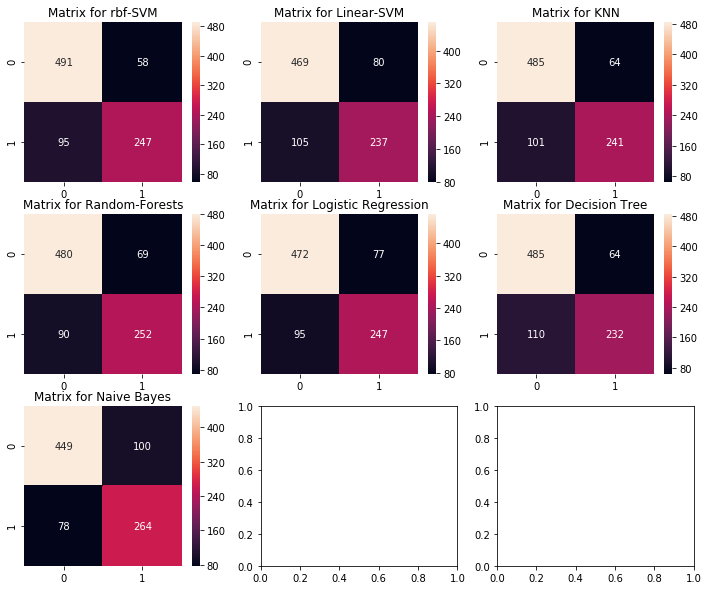

In [86]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [87]:
from sklearn.model_selection import GridSearchCV

In [89]:
c=[0.1,0.2,0.5,1,5,10]
gamma=[0.01,0.1,0.2,0.5,1,2,5,10]
kernels=['rbf','linear']
hyper={'C':c,'gamma':gamma,'kernel':kernels}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
0.828282828283
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed:    6.3s finished


In [92]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   21.8s finished


0.817059483726
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [93]:
from sklearn.ensemble import VotingClassifier
VC = VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))],voting='soft').fit(train_X,train_Y)
VC.score(test_X,test_Y)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.82089552238805974

In [94]:
cv=cross_val_score(VC,X,Y,cv=5,scoring='accuracy')
print(cv.mean())

0.819337808139


In [99]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=500)
model.fit(train_X,train_Y)
model.score(test_X,test_Y)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.83582089552238803

In [100]:
cv = cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print(cv.mean())

0.817136533878


In [101]:
#You can do the same for decision tree classifier as base-estimator

In [103]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.1,random_state=0)
cv=cross_val_score(model,X,Y,cv=10)
cv.mean()

0.82495261604812176

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
cv=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
cv.mean()

0.81828623311769388

In [107]:
#You can perform xgboost as well but I don't currently have that module specifically

In [108]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  6.5min finished


0.83164983165
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=200, random_state=None)


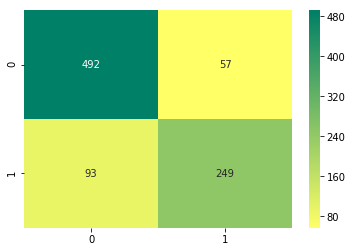

In [109]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='summer_r',annot=True,fmt='2.0f')
plt.show()

In [110]:
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
model.feature_importances_ #(feature_importances_ is available in forest based classifiers which uses a number of decision trees)

array([ 0.13638741,  0.18832734,  0.0487303 ,  0.03272655,  0.05640986,
        0.25414886,  0.09088985,  0.0767853 ,  0.01153754,  0.10405699])

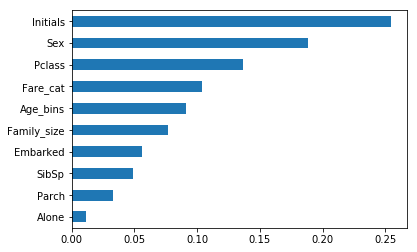

In [119]:
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh()
plt.show()